In [13]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50

import pandas as pd
import numpy as np
import xgboost as xgb


In [2]:
train_data = pd.read_csv('../example3+4/titanic_train.csv', index_col=0)
train_data['Embarked'] = train_data['Embarked'].astype(str)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = train_data[['Pclass', 'Age']]
y = train_data.Survived

In [4]:
model = xgb.XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
# https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html
model.get_booster().save_model('./xgb_model.json')

In [6]:
!cat xgb_model.json

{"learner":{"attributes":{},"gradient_booster":{"model":{"gbtree_model_param":{"num_trees":"100","size_leaf_vector":"0"},"tree_info":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],"trees":[{"base_weights":[-4.6256983E-1,2.2772278E-1,-1.0222223E0,1.4871795E0,9.214092E-2,2.3529412E-1,-1.1053764E0,4.4230768E-1,-3.5151514E-1,-1.0526316E-1,5.263158E-1,-9.97389E-1,-1.5348837E0,9.189189E-1,-9.90099E-2,-2.6666668E-1,-9.4736844E-1,6.666667E-1,-9.0909094E-1,-1.0329671E0,-2.6086956E-1,6.896552E-2,-8.888889E-1,-3.75E-1,3.0769232E-1,-3.8297874E-1,5.4545456E-1,-2.9508197E-1,-1.2E0,1E0,-0E0],"default_left":[true,false,false,false,true,false,true,false,true,false,false,true,false,false,true,true,false,false,false,false,false,true,false,true,false,false,false,false,false,false,false],"id":0,"leaf_child_counts":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
model1 = xgb.Booster()
model1.load_model('./xgb_model.json')

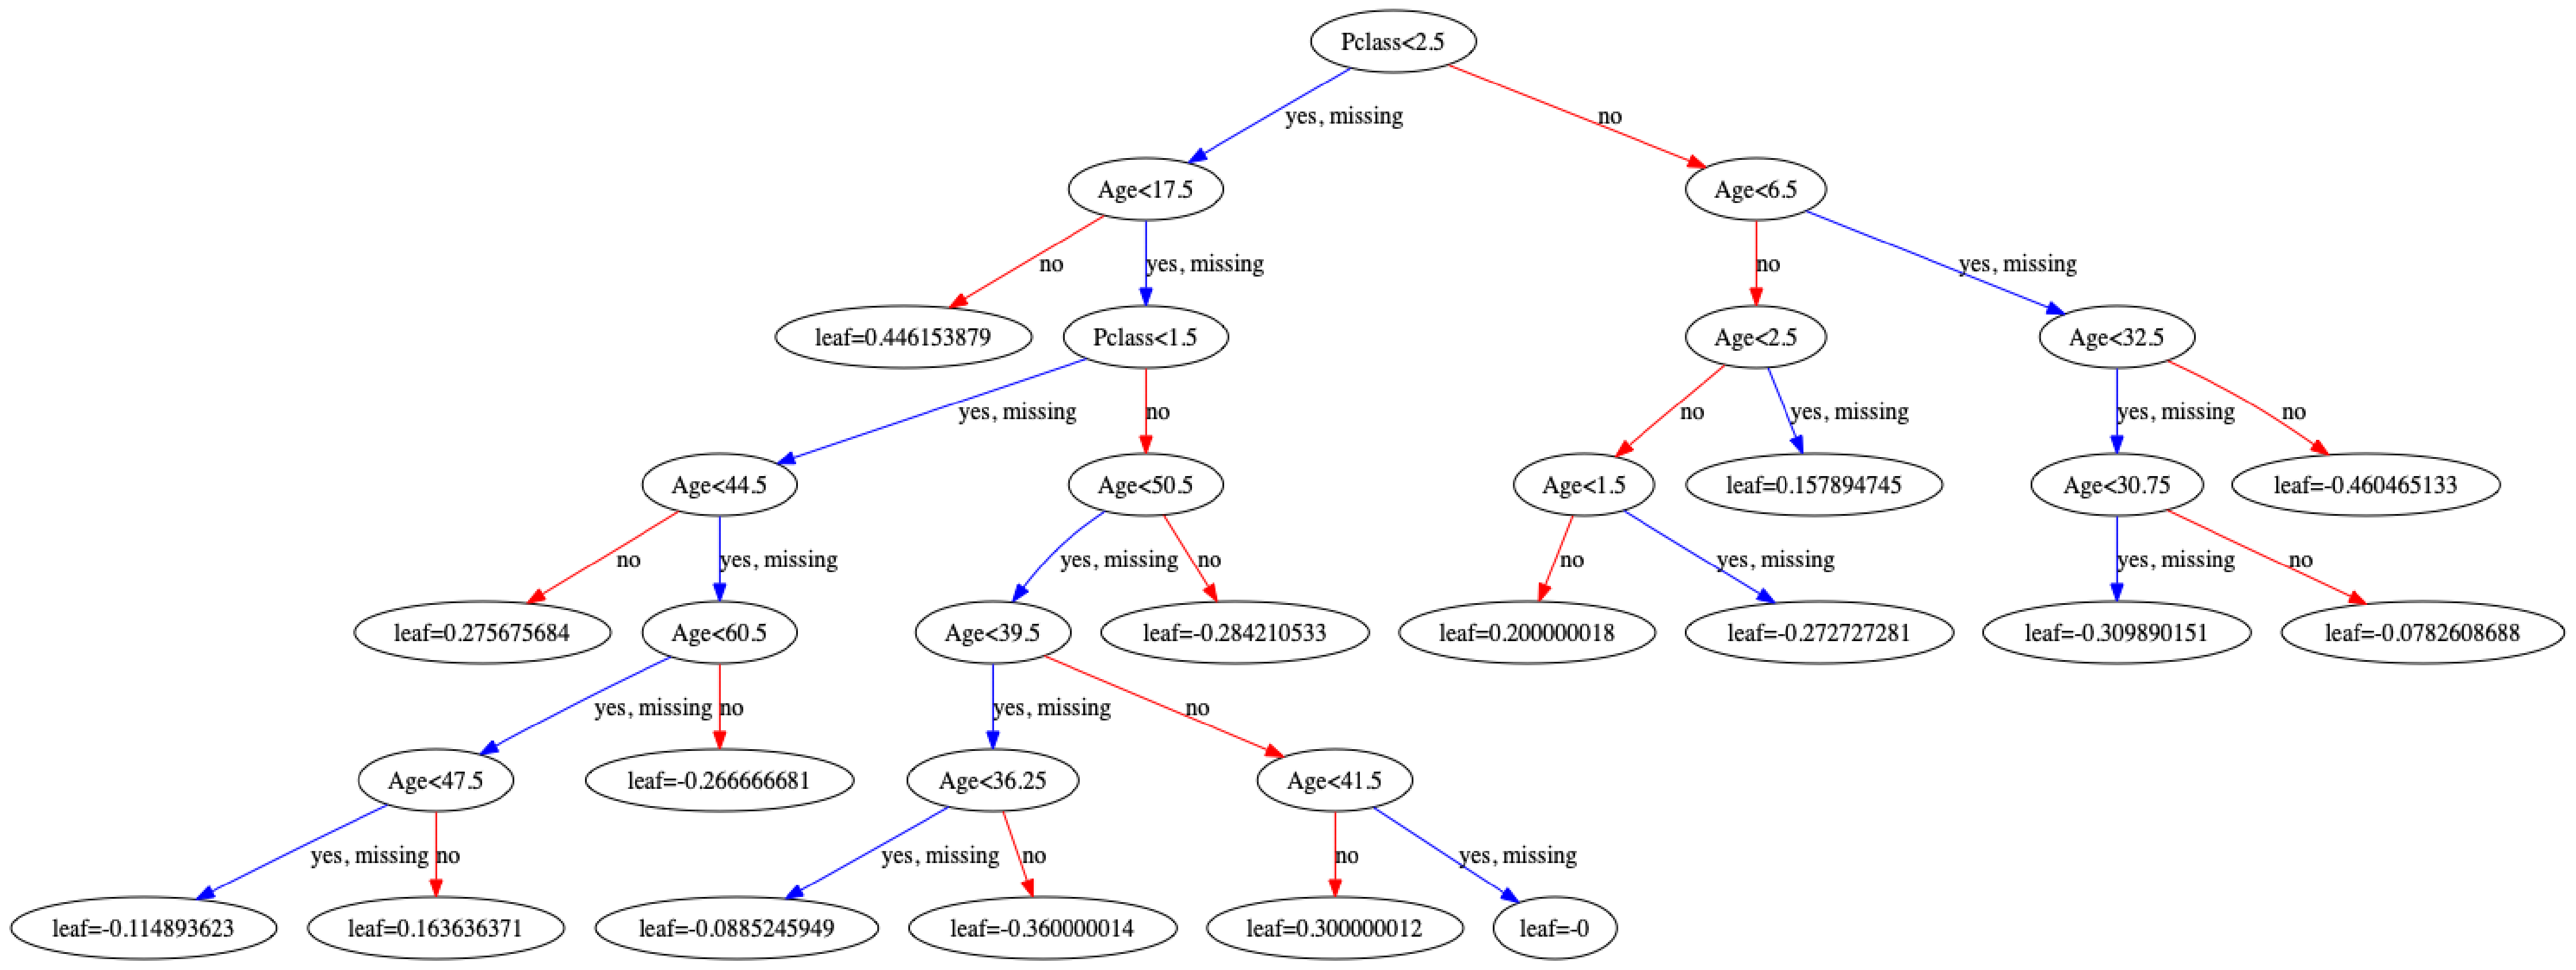

In [14]:
xgb.plot_tree(model)

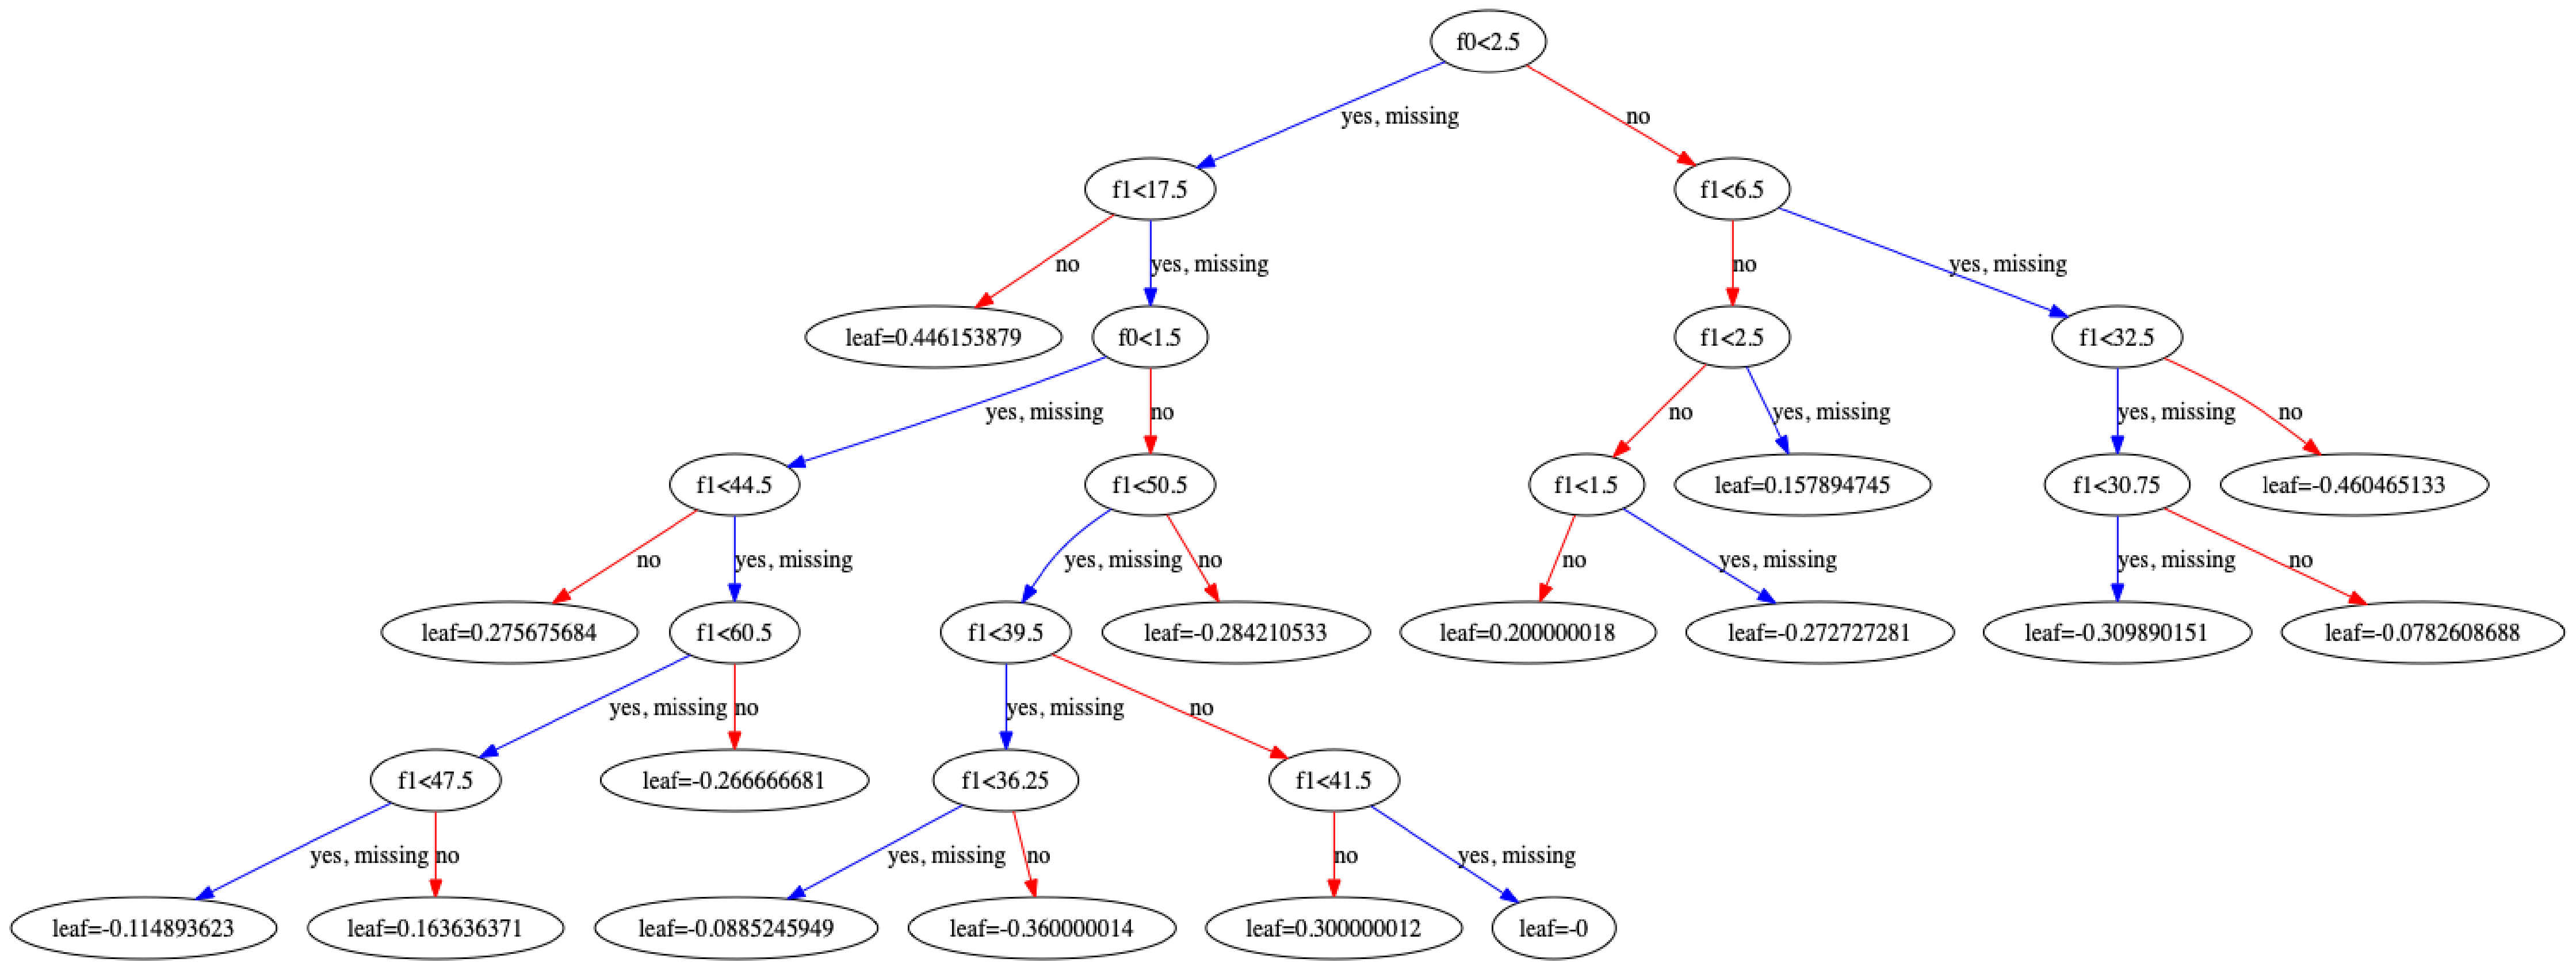

In [15]:
xgb.plot_tree(model1)